Korelacja miedzy SUS-score a lacznym czasem badania

Pearson correlation: -0.728
P-value: 0.00093


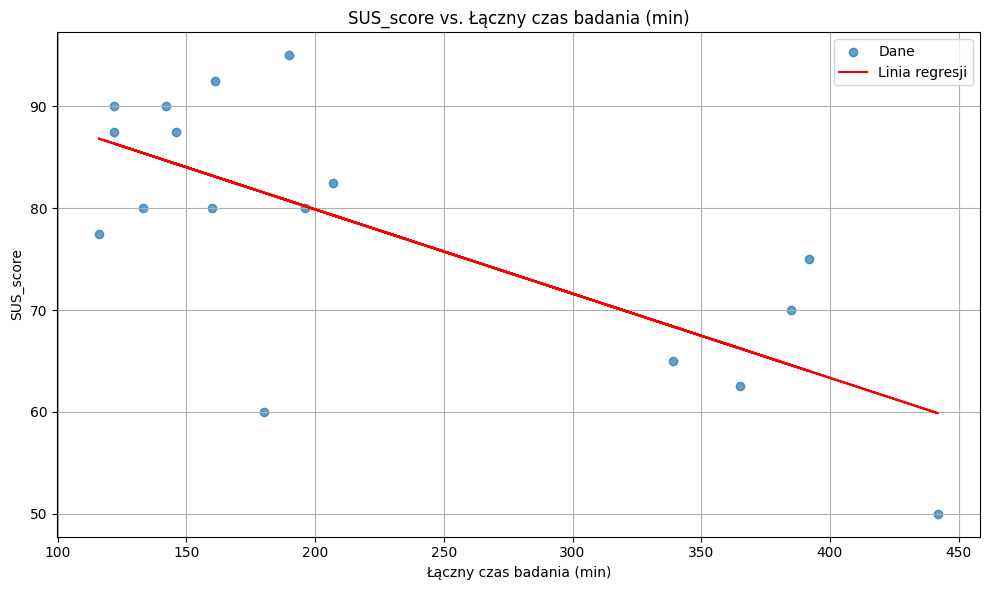

In [1]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.stats import linregress


df = pd.read_excel("Dane_magisterka.xlsx", sheet_name="Sheet1")

# Konwertowanie kolumny czasu na minuty (czas w formacie HH:MM:SS)
df['łączny czas badania (min)'] = pd.to_timedelta(df['łączny czas badania (min)'], errors='coerce').dt.total_seconds() / 60

# Usuwanie brakujących danych w kolumnach potrzebnych do analizy
df_clean = df[['SUS_score', 'łączny czas badania (min)']].dropna()

# Pobieranie danych
sus_scores = df_clean['SUS_score']
total_time = df_clean['łączny czas badania (min)']

# Obliczanie korelacj Pearsona
corr, p_value = pearsonr(total_time, sus_scores)

# Wyświetlanie wyników
print('Pearson correlation: %.3f' % corr)
print('P-value: %.5f' % p_value)


# Obliczenie regresji liniowej
slope, intercept, r_value, p_value, std_err = linregress(total_time, sus_scores)
regression_line = slope * total_time + intercept

# Wykres
plt.figure(figsize=(10, 6))
plt.scatter(total_time, sus_scores, label='Dane', alpha=0.7)
plt.plot(total_time, regression_line, color='red', label='Linia regresji')
plt.title('SUS_score vs. Łączny czas badania (min)')
plt.xlabel('Łączny czas badania (min)')
plt.ylabel('SUS_score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Pearson correlation: -0.728
P-value: 0.00093
R-squared: 0.529


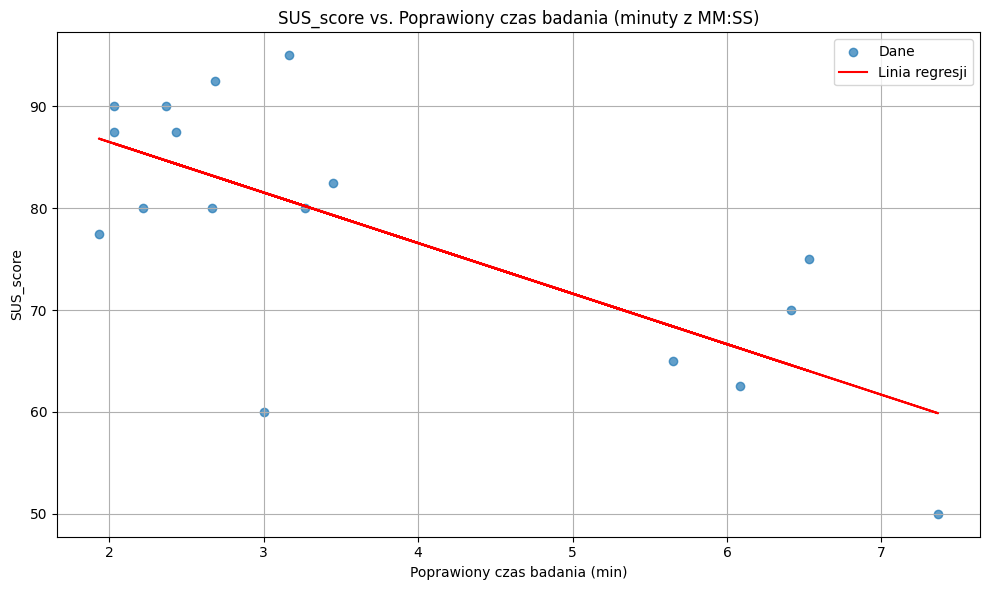

In [8]:
import pandas as pd
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
df = pd.read_excel("Dane_magisterka.xlsx", sheet_name="Sheet1")

# Usunięcie nadmiarowych spacji z nazw kolumn
df.columns = df.columns.str.strip()

# Funkcja do konwersji formatu MM:SS (zapisane jako HH:MM:SS) na minuty
def convert_wrong_hhmmss_to_minutes(time_str):
    try:
        parts = time_str.strip().split(":")
        if len(parts) == 3:
            minutes = int(parts[0])      # faktycznie MM
            seconds = int(parts[1])      # faktycznie SS
            return minutes + seconds / 60
        elif len(parts) == 2:
            minutes = int(parts[0])
            seconds = int(parts[1])
            return minutes + seconds / 60
        else:
            return None
    except:
        return None

# Zastosowanie funkcji do konwersji
df['czas_minuty_poprawny'] = df['łączny czas badania (min)'].astype(str).apply(convert_wrong_hhmmss_to_minutes)

# Usuwanie braków
df_clean = df[['SUS_score', 'czas_minuty_poprawny']].dropna()

# Pobieranie danych
sus_scores = df_clean['SUS_score']
total_time = df_clean['czas_minuty_poprawny']

# Obliczenie korelacji Pearsona
corr, p_value = pearsonr(total_time, sus_scores)

# Regresja liniowa
slope, intercept, r_value, p_value_reg, std_err = linregress(total_time, sus_scores)
regression_line = slope * total_time + intercept

# Wyświetlenie wyników
print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"R-squared: {r_value**2:.3f}")

# Wykres
plt.figure(figsize=(10, 6))
plt.scatter(total_time, sus_scores, label='Dane', alpha=0.7)
plt.plot(total_time, regression_line, color='red', label='Linia regresji')
plt.title('SUS_score vs. Poprawiony czas badania (minuty z MM:SS)')
plt.xlabel('Poprawiony czas badania (min)')
plt.ylabel('SUS_score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Korelacja miedzy SUS_score a srednim czasem fiksacji 

Pearson correlation: -0.229
P-value: 0.37652


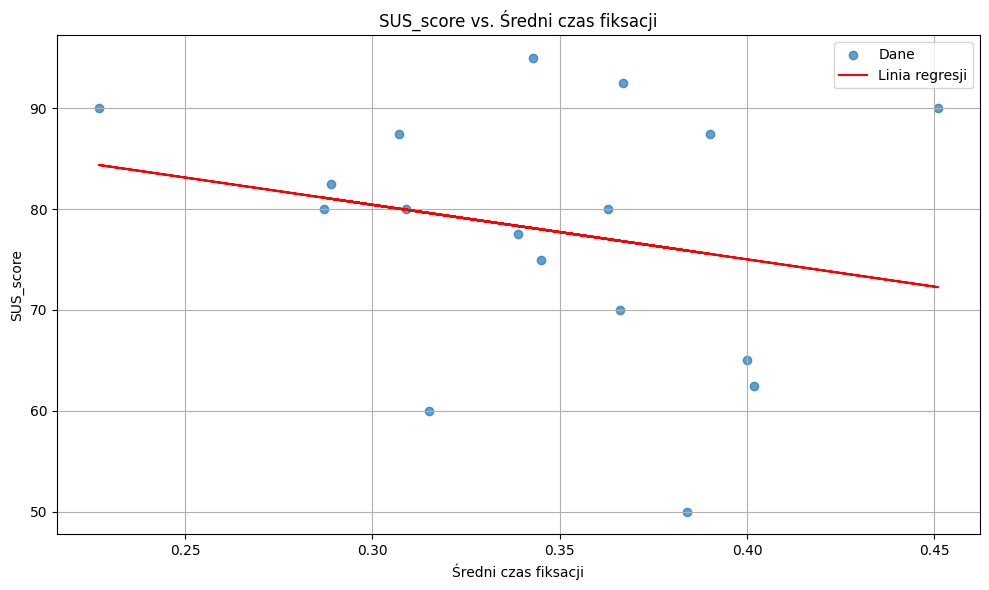

In [7]:


df_clean = df[['SUS_score', 'średni czas fiksacji (s)']].dropna()

sus_scores = df_clean['SUS_score']
avg_fix_time = df_clean['średni czas fiksacji (s)']

corr, p_value = pearsonr(avg_fix_time, sus_scores)

print('Pearson correlation: %.3f' % corr)
print('P-value: %.5f' % p_value)
# Obliczenie regresji liniowej
slope, intercept, r_value, p_value, std_err = linregress(avg_fix_time, sus_scores)
regression_line = slope * avg_fix_time + intercept  

# Wykres
plt.figure(figsize=(10, 6))
plt.scatter(avg_fix_time, sus_scores, label='Dane', alpha=0.7)
plt.plot(avg_fix_time, regression_line, color='red', label='Linia regresji')  
plt.title('SUS_score vs. Średni czas fiksacji')
plt.xlabel('Średni czas fiksacji')
plt.ylabel('SUS_score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Liczba fiksacji a sus score - p < 0.05

Pearson correlation: -0.674
P-value: 0.00300


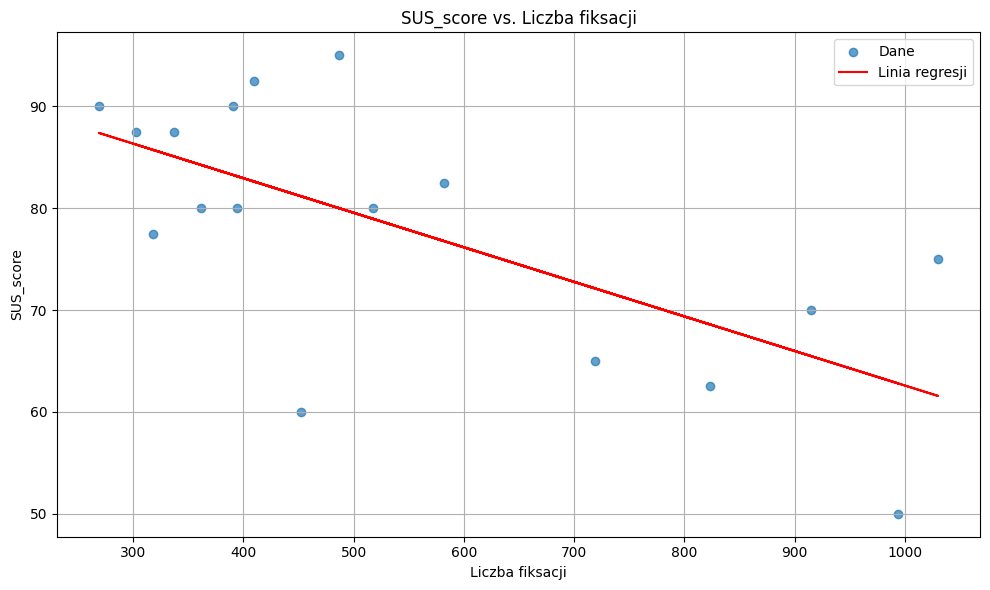

In [5]:

df_clean = df[['liczba fiksacji', 'SUS_score']].dropna()


num_fix = df_clean['liczba fiksacji']
sus_scores = df_clean['SUS_score']


corr, p_value = pearsonr(sus_scores, num_fix)


print('Pearson correlation: %.3f' % corr)
print('P-value: %.5f' % p_value)

# Obliczenie regresji liniowej
slope, intercept, r_value, p_value, std_err = linregress(num_fix, sus_scores)
regression_line = slope * num_fix + intercept  

# Wykres
plt.figure(figsize=(10, 6))
plt.scatter(num_fix, sus_scores, label='Dane', alpha=0.7)
plt.plot(num_fix, regression_line, color='red', label='Linia regresji')  
plt.title('SUS_score vs. Liczba fiksacji')
plt.xlabel('Liczba fiksacji')
plt.ylabel('SUS_score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

zrobi wykres, najlepiej jakby punkty ukladaly sie na linii trendu, mozan uzyc regresji liniowej